In [9]:
# Convert both columns to string type
df_commentary['Batter'] = df_commentary['Batter'].astype(str)
df_schedule['Match_Team'] = df_schedule['Match_Team'].astype(str)

# Retry merging
merged_df = pd.merge(df_commentary, df_schedule, left_on='Batter', right_on='Match_Team', how='inner')

# Preview merged data
print(merged_df.head())


Empty DataFrame
Columns: [Bowler, Batter, Ball_Type, Shot_Type, Ball_Speed_kmh, Runs_Scored, Match_id_x, Match_id_y, IPL_year, Match_Info, Match_Date, Match_Team, Match_Result, Match_Cricbuzz_URL, Stadium, Location, Highlights_available]
Index: []


In [10]:
# Preview unique values in both columns to understand how they match
print(df_commentary['Batter'].unique()[:10])
print(df_schedule['Match_Team'].unique()[:10])


['nan']
['ROYAL CHALLENGERS BANGALORE vs KOLKATA KNIGHT RIDERS'
 'KINGS XI PUNJAB vs CHENNAI SUPER KINGS'
 'DELHI CAPITALS vs RAJASTHAN ROYALS'
 'KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS'
 'MUMBAI INDIANS vs ROYAL CHALLENGERS BANGALORE'
 'RAJASTHAN ROYALS vs KINGS XI PUNJAB' 'DECCAN CHARGERS vs DELHI CAPITALS'
 'CHENNAI SUPER KINGS vs MUMBAI INDIANS'
 'DECCAN CHARGERS vs RAJASTHAN ROYALS' 'KINGS XI PUNJAB vs MUMBAI INDIANS']


In [11]:
# 📚 Import required libraries
import pandas as pd

# 📂 Load the datasets
df_commentary = pd.read_csv('Extracted_IPL_Commentary_Data.csv')      # Existing commentary data
df_new = pd.read_excel('IPL_Merged_Data.xlsx')                       # New Excel file

# 🔍 Preview column names in both datasets
print("Commentary Dataset Columns:", df_commentary.columns.tolist())
print("New Excel Dataset Columns:", df_new.columns.tolist())

# 🛠️ Clean column names (remove spaces & standardize case)
df_commentary.columns = df_commentary.columns.str.strip().str.lower()
df_new.columns = df_new.columns.str.strip().str.lower()

# 🔄 Attempt merging (update 'match_id' if different column used for linking)
merged_df = pd.merge(df_commentary, df_new, how='inner', on='match_id')  # Replace 'match_id' if needed

# 📝 Preview merged dataset
print(merged_df.head())

# 💾 Save merged dataset to Excel
merged_df.to_excel('Final_Merged_IPL_Data.xlsx', index=False)
print("✅ Merged file saved successfully as 'Final_Merged_IPL_Data.xlsx'")


FileNotFoundError: [Errno 2] No such file or directory: 'IPL_Merged_Data.xlsx'

In [12]:
import pandas as pd 

df=pd.read_csv("IPL_Match_Highlights_Commentary.csv")
df

,Match_id,Team,Over_num,Commentary,batsman,score
0,4281444,RCB 1st Inns,0.5,"Nehra to Mandeep, FOUR, first boundary for Man...",Nehra to Mandeep,FOUR
1,4281444,RCB 1st Inns,1.0,"Nehra to Mandeep, FOUR, back-to-back boundarie...",Nehra to Mandeep,FOUR
2,4281444,RCB 1st Inns,10.0,"Henriques to Kedar Jadhav, FOUR, hit straight ...",Henriques to Kedar Jadhav,FOUR
3,4281444,RCB 1st Inns,10.4,"Nehra to Kedar Jadhav, FOUR, another full toss...",Nehra to Kedar Jadhav,FOUR
4,4281444,RCB 1st Inns,10.5,"Nehra to Kedar Jadhav, FOUR, four more. Jadhav...",Nehra to Kedar Jadhav,FOUR
...,...,...,...,...,...,...
11569,5937426,RR 1st Inns,4.0,"Rabada to Smith, FOUR, who'd've thought the wo...",Rabada to Smith,FOUR
11570,5937426,RR 1st Inns,5.2,"Harshal Patel to Jaiswal, SIX, short ball, and...",Harshal Patel to Jaiswal,SIX
11571,5937426,RR 1st Inns,6.2,"Ashwin to Smith, FOUR, a rare rank half-tracke...",Ashwin to Smith,FOUR
11572,5937426,RR 1st Inns,7.0,"Ashwin to Jaiswal, 1 run, pushes this one hast...",Ashwin to Jaiswal,ONE


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11574 entries, 0 to 11573
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Match_id    11574 non-null  int64  
 1   Team        11574 non-null  object 
 2   Over_num    11574 non-null  float64
 3   Commentary  11574 non-null  object 
 4   batsman     11574 non-null  object 
 5   score       11574 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 542.7+ KB


In [14]:
df.columns

Index(['Match_id', 'Team', 'Over_num', 'Commentary', 'batsman', 'score'], dtype='object')

In [15]:
import pandas as pd 

commentary_df = pd.read_csv('IPL_Match_Highlights_Commentary.csv')  
match_details_df = pd.read_csv('IPL_SCHEDULE_2008_2020.csv')  

merged_df = commentary_df.merge(match_details_df, on='Match_id', how='left')


excel_filename = "IPL_Merged_Data.xlsx"
with pd.ExcelWriter(excel_filename) as writer:
    merged_df.to_excel(writer, sheet_name="Commentary Data", index=False)
    match_details_df.to_excel(writer, sheet_name="Match Details", index=False)

print(f"Excel file '{excel_filename}' has been created successfully!")

Excel file 'IPL_Merged_Data.xlsx' has been created successfully!


In [16]:
import pandas as pd
import re

# Load the merged dataset
df = pd.read_excel("IPL_Merged_Data.xlsx", sheet_name="Commentary Data")

# Function to extract required details from Commentary
def extract_details(commentary):
    bowler = re.findall(r'(\b[A-Z][a-z]+\s[A-Z][a-z]+)\s+to', commentary)
    batter = re.findall(r'to\s(\b[A-Z][a-z]+\s[A-Z][a-z]+)', commentary)
    ball_type = "Normal Ball"  # Default type
    
    if "wide" in commentary.lower():
        ball_type = "Wide Ball"
    elif "no ball" in commentary.lower():
        ball_type = "No Ball"

    shot_type = "Dot Ball"  # Default type
    if "four" in commentary.lower():
        shot_type = "Boundary"
    elif "six" in commentary.lower():
        shot_type = "Six"
    elif "single" in commentary.lower() or "1 run" in commentary.lower():
        shot_type = "Single"

    speed = re.findall(r'(\d{3})\s?km', commentary)  # Extract ball speed if mentioned
    runs = re.findall(r'(\d+)\srun', commentary)  # Extract runs scored

    return {
        "Bowler Name": bowler[0] if bowler else None,
        "Batter Name": batter[0] if batter else None,
        "Ball Type": ball_type,
        "Shot Type": shot_type,
        "Speed (km/h)": speed[0] if speed else "-",
        "Runs Scored": runs[0] if runs else "0"
    }

# Apply extraction function to the Commentary column
extracted_data = df["Commentary"].apply(extract_details).apply(pd.Series)

# Merge the extracted data with original dataframe
df = pd.concat([df, extracted_data], axis=1)

# Save the updated data with extracted columns
df.to_excel("IPL_Commentary_Processed.xlsx", index=False)

print("✅ Processed data saved as 'IPL_Commentary_Processed.xlsx'")

✅ Processed data saved as 'IPL_Commentary_Processed.xlsx'


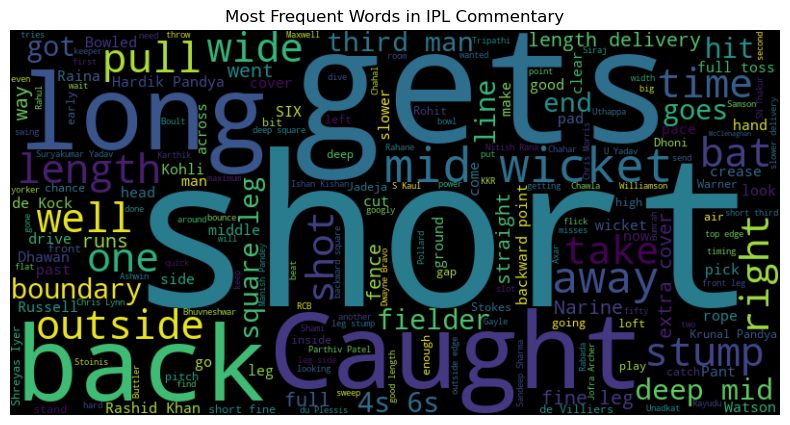

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Load the processed dataset
df = pd.read_excel("IPL_Commentary_Processed.xlsx")

# Combine all commentary text
text = " ".join(comment for comment in df["Commentary"].astype(str))

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["the", "a", "to", "for", "of", "and", "in", "on", "at", "is", "ball", "run", "batsman", "bowler"])

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords=stopwords, colormap="viridis").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in IPL Commentary")
plt.show()

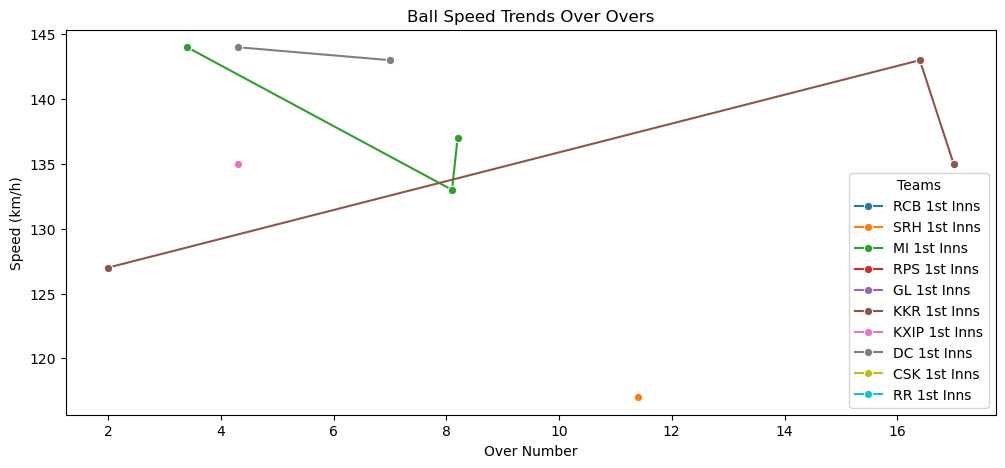

In [18]:
import seaborn as sns

# Convert speed column to numeric (handle missing values)
df["Speed (km/h)"] = pd.to_numeric(df["Speed (km/h)"], errors='coerce')

# Plot the trend of ball speed over overs
plt.figure(figsize=(12, 5))
sns.lineplot(x=df["Over_num"], y=df["Speed (km/h)"], hue=df["Team"], marker="o")

plt.title("Ball Speed Trends Over Overs")
plt.xlabel("Over Number")
plt.ylabel("Speed (km/h)")
plt.legend(title="Teams")
plt.show()
